In [34]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [35]:
bankdata = pd.read_csv("bill_authentication.csv")  

In [36]:
bankdata.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,1


In [37]:
X = bankdata.drop('Class', axis=1)  
y = bankdata['Class'] 

In [38]:
X.shape

(1372, 4)

In [39]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=40) 

In [40]:
# Linear SVM:
    
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')  
svclassifier.fit(X_train, y_train)

SVC(kernel='linear')

In [41]:
y_pred = svclassifier.predict(X_test)  

In [42]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred)) 

[[145   3]
 [  1 126]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       148
           1       0.98      0.99      0.98       127

    accuracy                           0.99       275
   macro avg       0.98      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



In [43]:
# Polynomial Kernel:

from sklearn.svm import SVC  
svclassifier_poly = SVC(kernel='poly', degree=2)  
svclassifier_poly.fit(X_train, y_train)  

SVC(degree=2, kernel='poly')

In [44]:
y_pred = svclassifier_poly.predict(X_test) 

In [45]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

[[141   7]
 [  1 126]]
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       148
           1       0.95      0.99      0.97       127

    accuracy                           0.97       275
   macro avg       0.97      0.97      0.97       275
weighted avg       0.97      0.97      0.97       275



In [46]:
# RBF Kernel

from sklearn.svm import SVC  
svclassifier_rbf = SVC(kernel='rbf')  
svclassifier_rbf.fit(X_train, y_train) 

SVC()

In [47]:
y_pred = svclassifier_rbf.predict(X_test)  

In [48]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

[[146   2]
 [  1 126]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       148
           1       0.98      0.99      0.99       127

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



In [49]:
################################################################################################################################

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


c:\Users\Louis\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


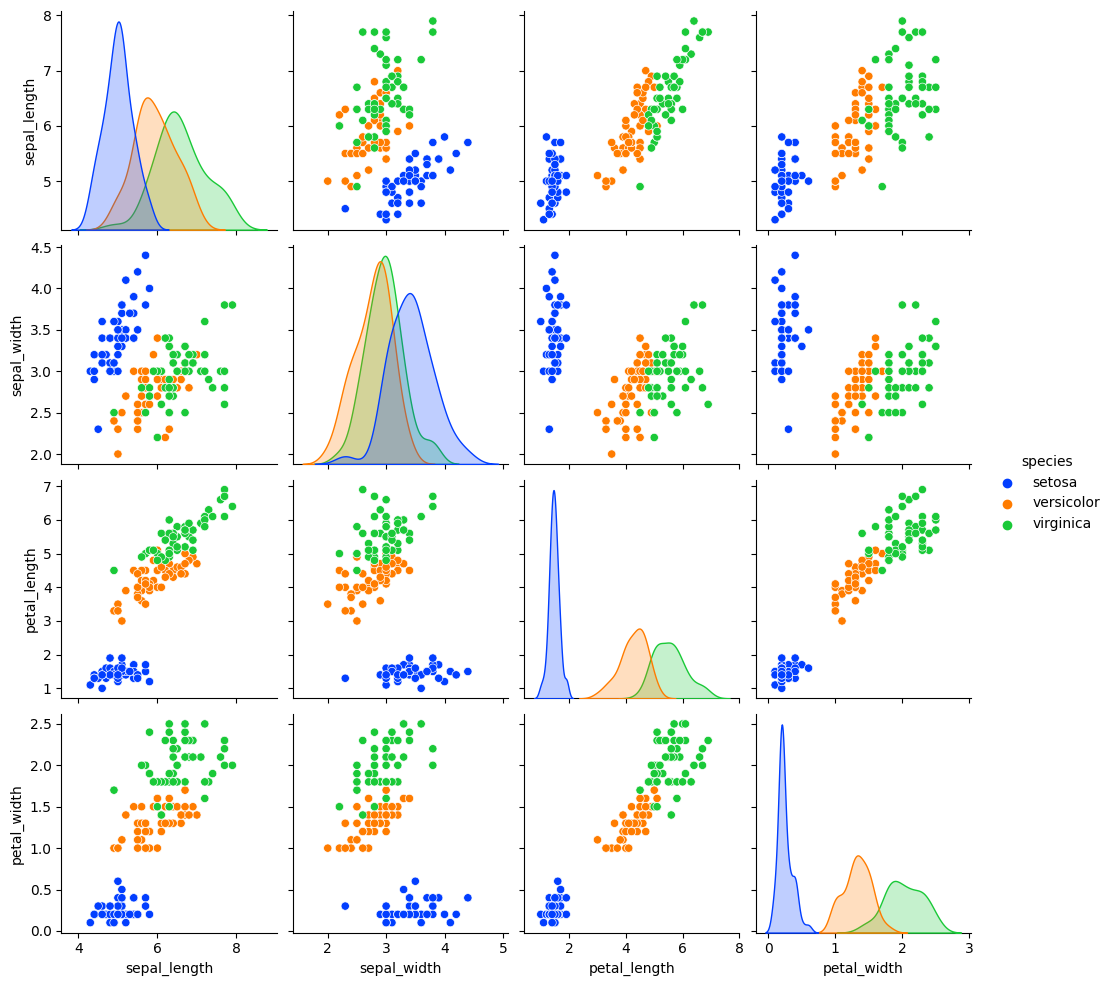

In [50]:
import seaborn as sns
iris = sns.load_dataset("iris")
print(iris.head())
y = iris.species
X = iris.drop('species',axis=1)
sns.pairplot(iris, hue="species",palette="bright")

In [51]:
df=iris[(iris['species']!='virginica')]
df=df.drop(['sepal_length','sepal_width'], axis=1)
df.head()

,petal_length,petal_width,species
0,1.4,0.2,setosa
1,1.4,0.2,setosa
2,1.3,0.2,setosa
3,1.5,0.2,setosa
4,1.4,0.2,setosa


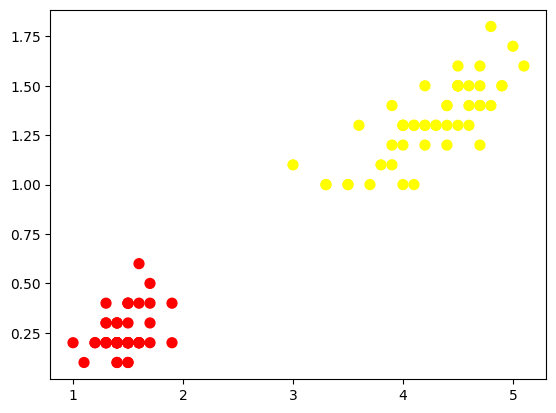

In [52]:
#let's convert categorical values to numerical target
df=df.replace('setosa', 0)
df=df.replace('versicolor', 1)
X=df.iloc[:,0:2]
y=df['species']
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=50, cmap='autumn')

In [53]:
from sklearn.svm import SVC 
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

In [54]:
# We can also call and visualize the coordinates of our support vectors:

model.support_vectors_

array([[1.9, 0.4],
       [3. , 1.1]])

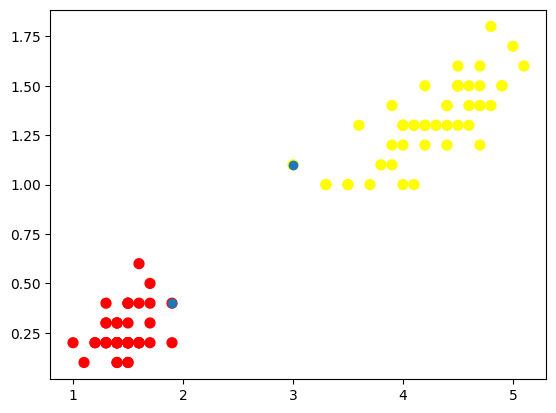

In [55]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=50, cmap='autumn')
plt.scatter(model.support_vectors_[:,0],model.support_vectors_[:,1])

c:\Users\Louis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


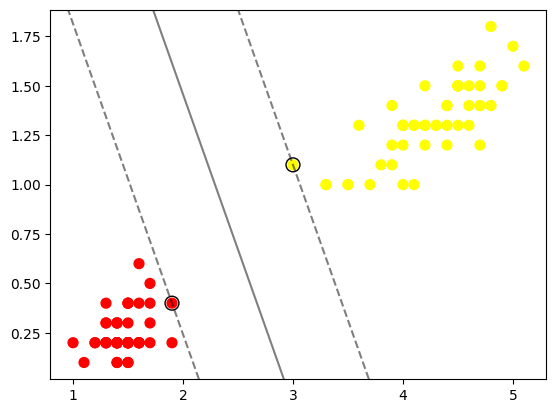

In [56]:
ax = plt.gca()
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=50, cmap='autumn')
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

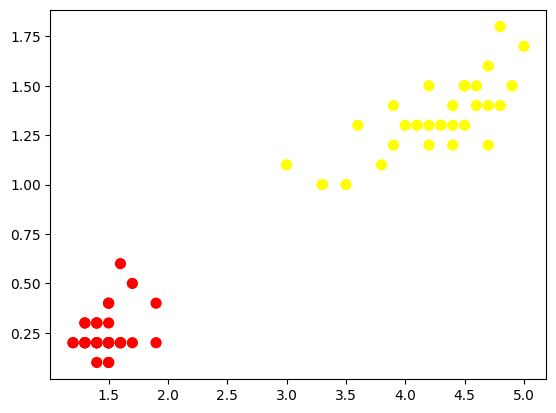

In [57]:
red_sample=df.sample(frac=0.7)
X=red_sample.iloc[:,0:2]
y=red_sample['species']
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=50, cmap='autumn')

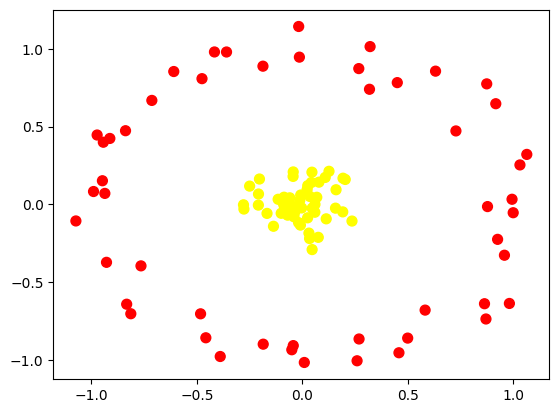

In [58]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

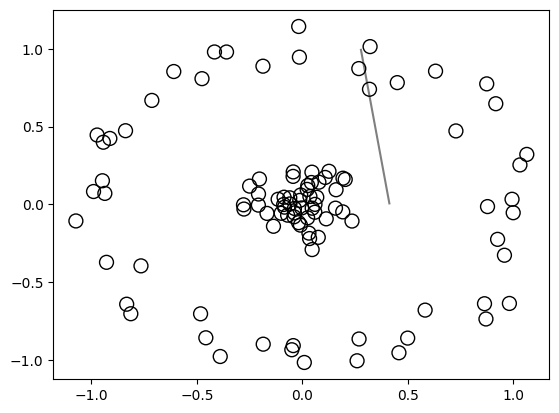

In [59]:
model=SVC(kernel='linear').fit(X, y)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)
# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

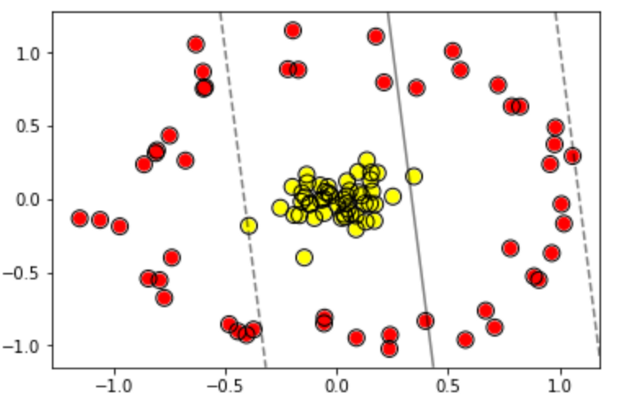

Text(0.5, 0, 'r')

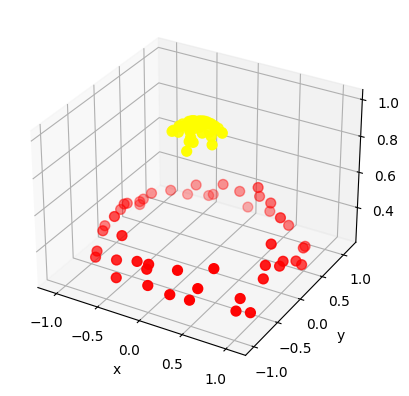

In [60]:
from mpl_toolkits import mplot3d
#setting the 3rd dimension with RBF centered on the middle clump
r = np.exp(-(X ** 2).sum(1))
ax = plt.subplot(projection='3d')
ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('r')

In [61]:
model=SVC(kernel='rbf').fit(X, y)

In [62]:
################################################################################################################################

In [63]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [64]:
# Importing the dataset
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

In [65]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [66]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [67]:
# Fitting the classifier classifier to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state= 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [68]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [69]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[66  2]
 [ 8 24]]


C:\Users\Louis\AppData\Local\Temp\ipykernel_4392\1442576436.py:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], alpha=0.5,


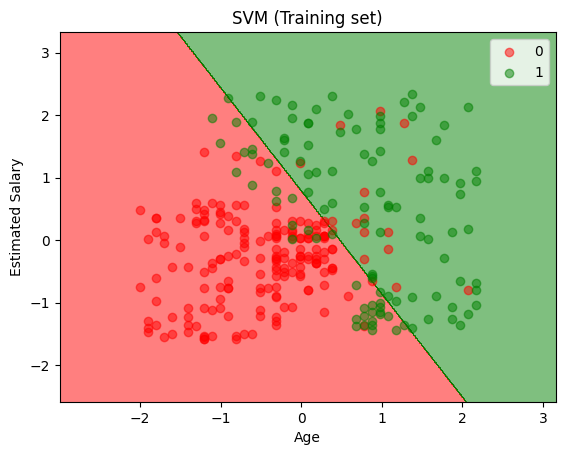

In [70]:
# Visualising the Training set results

from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.5, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], alpha=0.5,
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

C:\Users\Louis\AppData\Local\Temp\ipykernel_4392\3294547641.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], alpha=0.5,


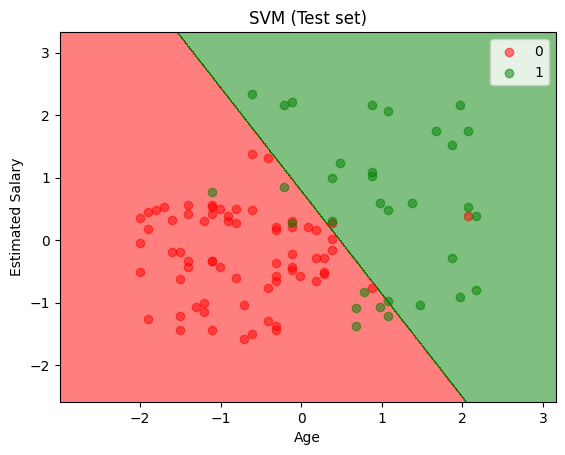

In [71]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.5, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], alpha=0.5,
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

These are the linear separation kernel on training and testing set. We observe that there is good classification in the graph.

In [72]:
################################################################################################################################

### Multiclass Classification using SVM

In [73]:
#Importing the necessary packages and libaries
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import svm, datasets
import matplotlib.pyplot as plt
import numpy as np

In [74]:
iris = datasets.load_iris()
#Store variables as target y and the first two features as X (sepal length and sepal width of the iris flowers)
X = iris.data[:, :2]
y = iris.target

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state = 0)

In [76]:
linear = svm.SVC(kernel='linear', C=1, decision_function_shape='ovo').fit(X_train, y_train)
rbf = svm.SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovo').fit(X_train, y_train)
poly = svm.SVC(kernel='poly', degree=3, C=1, decision_function_shape='ovo').fit(X_train, y_train)
sig = svm.SVC(kernel='sigmoid', C=1, decision_function_shape='ovo').fit(X_train, y_train)

In [77]:
#stepsize in the mesh, it alters the accuracy of the plotprint
#to better understand it, just play with the value, change it and print it
h = .01
#create the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
# create the title that will be shown on the plot
titles = ['Linear kernel','RBF kernel','Polynomial kernel','Sigmoid kernel']

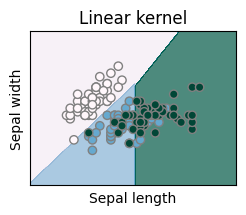

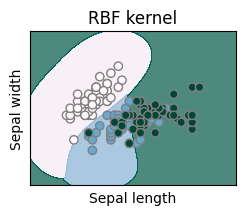

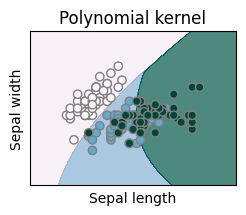

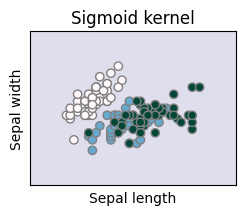

In [78]:
for i, clf in enumerate((linear, rbf, poly, sig)):
    #defines how many plots: 2 rows, 2columns=> leading to 4 plots
    plt.subplot(2, 2, i + 1) #i+1 is the index
    #space between plots
    plt.subplots_adjust(wspace=0.4, hspace=0.4) 
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.PuBuGn, alpha=0.7)
    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.PuBuGn,     edgecolors='grey')
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
    plt.show()

In [79]:
linear_pred = linear.predict(X_test)
poly_pred = poly.predict(X_test)
rbf_pred = rbf.predict(X_test)
sig_pred = sig.predict(X_test)

In [80]:
# retrieve the accuracy and print it for all 4 kernel functions
accuracy_lin = linear.score(X_test, y_test)
accuracy_poly = poly.score(X_test, y_test)
accuracy_rbf = rbf.score(X_test, y_test)
accuracy_sig = sig.score(X_test, y_test)
print('Accuracy Linear Kernel:', accuracy_lin)
print('Accuracy Polynomial Kernel:', accuracy_poly)
print('Accuracy Radial Basis Kernel:', accuracy_rbf)
print('Accuracy Sigmoid Kernel:', accuracy_sig)

Accuracy Linear Kernel: 0.7333333333333333
Accuracy Polynomial Kernel: 0.7333333333333333
Accuracy Radial Basis Kernel: 0.6666666666666666
Accuracy Sigmoid Kernel: 0.2


In [81]:
# creating a confusion matrix
cm_lin = confusion_matrix(y_test, linear_pred)
cm_poly = confusion_matrix(y_test, poly_pred)
cm_rbf = confusion_matrix(y_test, rbf_pred)
cm_sig = confusion_matrix(y_test, sig_pred)

print(cm_lin)
print(cm_poly)
print(cm_rbf)
print(cm_sig)

[[11  0  0]
 [ 0  8  5]
 [ 0  3  3]]
[[11  0  0]
 [ 0  8  5]
 [ 0  3  3]]
[[11  0  0]
 [ 0  5  8]
 [ 0  2  4]]
[[ 0  0 11]
 [ 0  0 13]
 [ 0  0  6]]


In [82]:
NB = GaussianNB()  
NB.fit(X_train, y_train)   
y_predict = NB.predict(X_test)  
print("Accuracy NB: {:.2f}".format(NB.score(X_test, y_test)))

NameError: name 'GaussianNB' is not defined

### OR the following code

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Create and train a Gaussian Naive Bayes classifier
NB = GaussianNB()
NB.fit(X_train, y_train)

# Make predictions on the test data
y_predict = NB.predict(X_test)

# Calculate and print the accuracy of the classifier
accuracy = NB.score(X_test, y_test)
print("Accuracy NB: {:.2f}".format(accuracy))

Accuracy NB: 1.00
